# Processamento inicial dos dados e construção de um CSV legível

In [1]:
import pandas as pd

In [2]:
dic   = pd.read_excel('dicionario.xls', dtype = str)
sizes = dic[~dic['size'].isna()]
sizes = sizes['size'].values.tolist()
sizes = [int(x) for x in sizes]

names = dic[~dic['code'].isna()]
names = names.loc[~names['code'].duplicated(keep='first')]

In [3]:
#type(names)
#sizes[0]
df = pd.read_fwf('PNS_2019.txt', widths=sizes, names=names['code'])

In [4]:
df.head()

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,11,1110011,110000016,1,1,2019,6.0,1,1,1.0,...,1.0,6.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20220504
1,11,1110011,110000016,1,1,2019,6.0,1,1,0.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20220504
2,11,1110011,110000016,1,1,2019,6.0,1,1,0.0,...,1.0,4.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20220504
3,11,1110011,110000016,1,1,2019,6.0,1,1,9.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20220504
4,11,1110011,110000016,1,1,2019,6.0,1,1,9.0,...,NaN,NaN,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20220504


In [5]:
df.to_csv('PNS_2019.csv')

# preprocessamento
Essa etapa requer a presença do arquivo <span style = "color: rgb(20,170,50)">**PNS_2019.csv**</span>

In [6]:
import pandas as pd
import datetime

In [7]:
df  = pd.read_csv('PNS_2019.csv')
dic = pd.read_excel('pre_proc_dicionario.xls')

## Criação do dataset preprocessado

In [8]:
codes = dic.code.dropna()
df = df[dic.code.dropna().tolist()]

In [9]:
df.to_csv('pre_proc_dataset.csv')

In [10]:
df.head()

,V0001,C006,P00901,P01101,P013,P015,P02001,P02101,P01601,P018,...,Q11008,Q11009,N00101,P035,Q00201,Q060,Q111,C00703,Q031,VDF004
0,11,2.0,1.0,3.0,6.0,3.0,7.0,2.0,0.0,3.0,...,NaN,NaN,3.0,1.0,1.0,1.0,NaN,1963.0,NaN,2.0
1,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,2.0
2,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.0,NaN,2.0
3,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999.0,NaN,2.0
4,11,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999.0,NaN,2.0


## Renomear colunas

In [11]:
names = dic[~dic['name'].isna()]
names = names.loc[~names['name'].duplicated(keep='first')]
df.set_axis(names['name'], axis=1, inplace=True)

In [12]:
df.to_csv('pre_proc_dataset.csv', index=False)

In [13]:
df.head()

name,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,transt_bipol,Transt_toc,saude,exercicio,hipertensao,colesterol,medic_doenc,nascimento,diabetes_idade,renda
0,11,2.0,1.0,3.0,6.0,3.0,7.0,2.0,0.0,3.0,...,NaN,NaN,3.0,1.0,1.0,1.0,NaN,1963.0,NaN,2.0
1,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,2.0
2,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.0,NaN,2.0
3,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999.0,NaN,2.0
4,11,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999.0,NaN,2.0


## Processar colunas

In [14]:
df = pd.read_csv('pre_proc_dataset.csv')

In [15]:
now = datetime.datetime.now()

In [16]:
def calculate_age(row):
    if pd.isna(row['nascimento']):
        return pd.NaT
    elif row['nascimento'] == 9999:
        return 9999
    else:
        birth_year = int(row['nascimento'])
        age = now.year - birth_year
        return age

In [17]:
df['altura'] = df[['alt_1', 'alt_2', 'alt_f']].mean(axis=1)
df['peso'] = df[['peso_1', 'peso_2', 'peso_f']].mean(axis=1)
df['imc'] = df['peso'] / (df['altura'] ** 2)

df['idade'] = df.apply(lambda row: calculate_age(row), axis=1)

df = df.drop(['alt_1', 'alt_2', 'alt_f','peso_1', 'peso_2', 'peso_f', 'altura', 'peso', 'nascimento'], axis=1)


In [18]:
df.to_csv('pre_proc_dataset.csv', index=False)

# Exploração
Essa etapa requer o arquivo <span style = "color: rgb(20,170,50)">**pre_proc_dataset.csv**</span>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Informações Basicas

In [20]:
df = pd.read_csv('pre_proc_dataset.csv')
df.head()

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,Transt_toc,saude,exercicio,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,imc,idade
0,11,2.0,1.0,3.0,6.0,3.0,7.0,2.0,0.0,3.0,...,NaN,3.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,60.0
1,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,73.0
2,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,36.0
3,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,9999.0
4,11,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,9999.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uf              293726 non-null  int64  
 1   sexo            279382 non-null  float64
 2   verd/legu       90846 non-null   float64
 3   carne_verm      90846 non-null   float64
 4   carne_fran      90846 non-null   float64
 5   carne_peix      90846 non-null   float64
 6   tomar_suco      90846 non-null   float64
 7   suco_tipo       30696 non-null   float64
 8   suco_natu       90846 non-null   float64
 9   frutas          90846 non-null   float64
 10  refri           90846 non-null   float64
 11  refri_tipo      41184 non-null   float64
 12  leite           90846 non-null   float64
 13  leite_tipo      63104 non-null   float64
 14  doces           90846 non-null   float64
 15  lanches         90846 non-null   float64
 16  consum_sal      90846 non-null   float64
 17  feijao    

In [22]:
df.describe()

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,Transt_toc,saude,exercicio,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,imc,idade
count,293726.000000,279382.000000,90846.000000,90846.000000,90846.000000,90846.000000,90846.000000,30696.000000,90846.000000,90846.000000,...,4905.000000,90846.000000,36398.000000,88736.000000,82881.000000,4905.000000,7101.000000,279210.000000,6730.000000,279382.000000
mean,28.844716,1.518788,4.398058,3.307939,2.895725,1.105673,1.196574,1.996123,2.597407,4.020188,...,1.939246,2.165544,3.365377,1.731214,1.837466,33.613660,50.265033,3.197174,0.002682,622.253685
std,11.762108,0.499648,2.460666,2.072346,1.770469,1.501453,2.092730,0.225044,2.409686,2.500836,...,0.238903,0.753347,1.931954,0.443331,0.368942,16.116982,15.065001,1.504282,0.000508,2337.288348
min,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.001196,4.000000
25%,21.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,22.000000,42.000000,2.000000,0.002334,22.000000
50%,27.000000,2.000000,5.000000,3.000000,3.000000,1.000000,0.000000,2.000000,2.000000,4.000000,...,2.000000,2.000000,3.000000,2.000000,2.000000,32.000000,51.000000,3.000000,0.002616,40.000000
75%,35.000000,2.000000,7.000000,5.000000,4.000000,2.000000,2.000000,2.000000,4.000000,7.000000,...,2.000000,3.000000,5.000000,2.000000,2.000000,44.000000,60.000000,4.000000,0.002973,60.000000
max,53.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000,7.000000,7.000000,...,2.000000,5.000000,7.000000,2.000000,2.000000,92.000000,97.000000,7.000000,0.005298,9999.000000


## Remoção inicial de linhas

In [22]:
df.dropna(subset=['diabetes'], inplace=True)
df = df.drop(df[(df['diabetes'] == 1) & (df['diabetes_idade'].isna())].index)

In [66]:
df.drop(df[df['idade'] == -7976].index, inplace=True)

In [23]:
df.to_csv('pre_proc_dataset.csv', index=False)

## Correlações

In [25]:
corr = df.corr()
corr.to_csv('correlation.csv')
corr

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,Transt_toc,saude,exercicio,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,imc,idade
uf,1.000000,-0.003160,0.189951,0.178238,-0.006628,-0.278518,0.087883,-0.036170,-0.107476,0.069438,...,-0.048331,-0.084689,-0.016110,-0.036494,-0.010796,0.019650,0.004449,0.259888,0.065021,-0.064059
sexo,-0.003160,1.000000,0.075356,-0.144086,0.054106,-0.001774,-0.026324,-0.019665,0.041223,0.122019,...,0.010881,0.070488,0.089659,-0.080790,-0.093607,0.050823,0.001881,-0.060478,0.110186,-0.015551
verd/legu,0.189951,0.075356,1.000000,0.061211,0.044352,0.004655,-0.054680,-0.034027,0.178277,0.361029,...,0.014951,-0.102482,0.102552,-0.049265,-0.033985,0.119318,0.027458,0.249835,0.047775,-0.030249
carne_verm,0.178238,-0.144086,0.061211,1.000000,-0.197329,-0.219194,0.081301,0.011685,-0.010697,-0.026671,...,0.008049,-0.087796,-0.061815,0.064322,0.052551,-0.048330,-0.035770,0.112749,-0.014012,-0.004751
carne_fran,-0.006628,0.054106,0.044352,-0.197329,1.000000,0.033452,0.028386,0.001637,0.066632,0.056708,...,0.023789,0.003079,0.068758,-0.023010,-0.015670,-0.012409,-0.017468,-0.037588,0.049833,0.014472
carne_peix,-0.278518,-0.001774,0.004655,-0.219194,0.033452,1.000000,-0.068713,0.010133,0.118667,0.079982,...,0.013274,0.018044,0.047503,-0.021221,-0.014441,0.049395,0.027037,-0.058821,0.004255,0.041792
tomar_suco,0.087883,-0.026324,-0.054680,0.081301,0.028386,-0.068713,1.000000,-0.009561,-0.205615,-0.110116,...,-0.010523,-0.011481,-0.082977,0.059058,0.058911,-0.108016,-0.065496,-0.115167,-0.019010,0.000707
suco_tipo,-0.036170,-0.019665,-0.034027,0.011685,0.001637,0.010133,-0.009561,1.000000,0.018145,-0.052735,...,-0.018284,-0.001501,-0.047537,0.049759,0.043426,-0.074101,-0.081161,-0.104145,-0.030172,0.013416
suco_natu,-0.107476,0.041223,0.178277,-0.010697,0.066632,0.118667,-0.205615,0.018145,1.000000,0.263613,...,0.007224,-0.051931,0.064922,0.011622,0.000608,0.024800,0.001729,0.068759,-0.002325,0.005027
frutas,0.069438,0.122019,0.361029,-0.026671,0.056708,0.079982,-0.110116,-0.052735,0.263613,1.000000,...,0.010961,-0.073806,0.148220,-0.073176,-0.068827,0.147267,0.079152,0.239408,0.023851,-0.022679


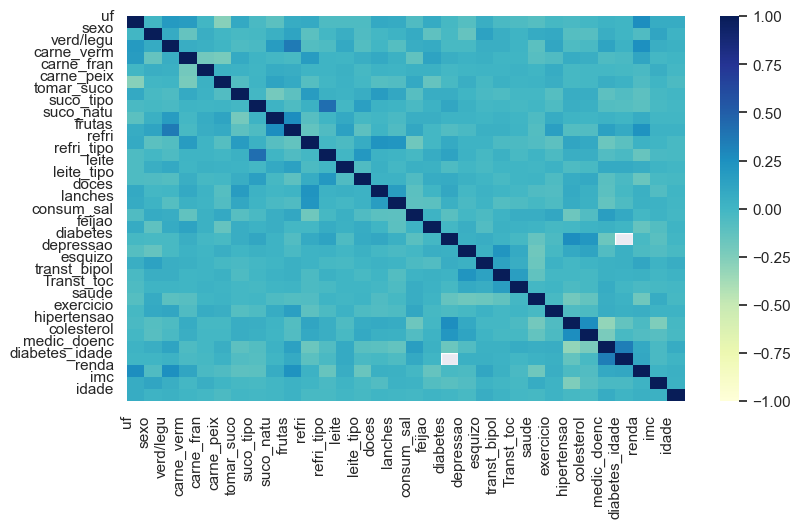

In [24]:
sns.heatmap(df.corr(), vmin=-1, vmax=+1, cbar=True, cmap='YlGnBu')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [25]:
df.corrwith(df["diabetes"])

uf               -0.023380
sexo             -0.030526
verd/legu        -0.029501
carne_verm        0.051128
carne_fran       -0.011496
carne_peix       -0.030499
tomar_suco        0.055494
suco_tipo         0.103370
suco_natu         0.016460
frutas           -0.069273
refri             0.084481
refri_tipo        0.126593
leite            -0.047440
leite_tipo        0.073645
doces             0.097355
lanches           0.042991
consum_sal       -0.093831
feijao           -0.014739
diabetes          1.000000
depressao         0.042422
esquizo           0.059344
transt_bipol      0.023090
Transt_toc       -0.022854
saude            -0.142068
exercicio        -0.043912
hipertensao       0.261845
colesterol        0.206403
medic_doenc      -0.170042
diabetes_idade         NaN
renda            -0.030392
imc              -0.097147
idade            -0.006061
dtype: float64

In [26]:
df[['diabetes','doces']].dropna().corr()

,diabetes,doces
diabetes,1.000000,0.097355
doces,0.097355,1.000000


## checagem de valores ausentes

In [86]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    if(any(df[col].isna())):
        print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:
exercicio : True -> 8771
hipertensao : True -> 72
colesterol : True -> 239
diabetes_idade : True -> 6819
renda : True -> 3
imc : True -> 12637


In [28]:
# quantos dados temos no dataset
len(df.index)

83800

In [88]:
# quantos individuos com diabetes confirmada
len(df[df['diabetes'] == 2].index)

6819

In [32]:
# quantos dados ausentes na variável saude

print(df['saude'].isnull().sum())

0


In [33]:
# Quantos dados ausentes tem a variável 'renda'?

df['renda'].isnull().sum()

21

## separação dos dados com mesma proporção de indivíduos com diabetes e sem

In [70]:
dados_1 = df[df['diabetes'] == 2]
dados_2 = df[df['diabetes'] == 1]
total_instancias_1 = len(dados_1)
dados_2_selecionados = dados_2.sample(n=total_instancias_1, random_state=12)
df = pd.concat([dados_1, dados_2_selecionados])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13638 entries, 82193 to 58270
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uf              13638 non-null  int64  
 1   sexo            13638 non-null  float64
 2   verd/legu       13638 non-null  float64
 3   carne_verm      13638 non-null  float64
 4   carne_fran      13638 non-null  float64
 5   carne_peix      13638 non-null  float64
 6   tomar_suco      13638 non-null  float64
 7   suco_natu       13638 non-null  float64
 8   frutas          13638 non-null  float64
 9   refri           13638 non-null  float64
 10  leite           13638 non-null  float64
 11  doces           13638 non-null  float64
 12  lanches         13638 non-null  float64
 13  consum_sal      13638 non-null  float64
 14  feijao          13638 non-null  float64
 15  diabetes        13638 non-null  float64
 16  depressao       13638 non-null  float64
 17  saude           13638 non-n

## Remoção de colunas com muitos valores nulos

In [35]:
df.drop(['esquizo', 'transt_bipol', 'Transt_toc', 'medic_doenc','suco_tipo', 'leite_tipo', 'refri_tipo'],axis=1, inplace=True)

In [ ]:
df.drop

## Análise numérica

In [71]:
# distinção de quantos casos positivos e negativos na variável 'diabetes'
df['diabetes'].value_counts()

2.0    6819
1.0    6819
Name: diabetes, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

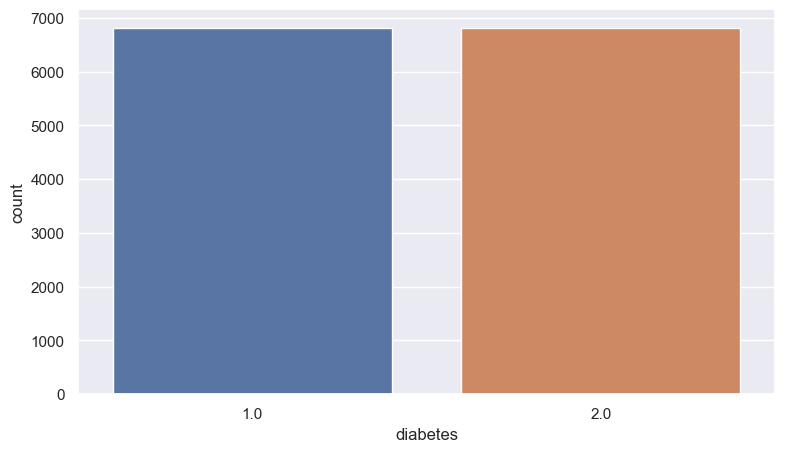

In [72]:
# em gráfico

sns.set()
sns.set(rc = {'figure.figsize':(9,5)})
sns.countplot(x="diabetes",data=df)

In [73]:
#média do imc para quem tem / não tem diabetes

df.groupby('diabetes')['imc'].mean()

diabetes
1.0    0.002862
2.0    0.002686
Name: imc, dtype: float64

In [78]:
# A mediana de idade em cada classe

df.groupby('diabetes')['idade'].median()

diabetes
1.0    67.0
2.0    49.0
Name: idade, dtype: float64

In [79]:
# Porcentagem de indivíduos com diabetes e sem

(df['diabetes'].value_counts()/len(df))*100

2.0    50.0
1.0    50.0
Name: diabetes, dtype: float64

In [80]:
# Variabilidade de cada variável

df.std()

uf                11.362275
sexo               0.495336
verd/legu          2.428449
carne_verm         2.100959
carne_fran         1.803925
carne_peix         1.499929
tomar_suco         1.948971
suco_natu          2.440546
frutas             2.479801
refri              1.645972
leite              3.037328
doces              2.046149
lanches            1.022919
consum_sal         0.760603
feijao             2.337427
diabetes           0.500018
depressao          0.321463
saude              0.806698
exercicio          1.937507
hipertensao        0.497788
colesterol         0.447700
diabetes_idade    14.977386
renda              1.520006
imc                0.000536
idade             17.283311
dtype: float64

In [81]:
# Porcentagem da variação de idade por classe

(df.groupby('diabetes')['idade'].std() / df.groupby('diabetes')['idade'].mean()) * 100

diabetes
1.0    19.658506
2.0    34.326167
Name: idade, dtype: float64

com o comando abaixo podemos ver que idade possúi outliers claros devido aos campos com o valor 9999 e isso deve ser tratado

In [84]:
df.idade.mean()

58.29366476022877

In [85]:
df[(df['idade'] == -7976) & (df['diabetes'] == 2)].count()

uf                0
sexo              0
verd/legu         0
carne_verm        0
carne_fran        0
carne_peix        0
tomar_suco        0
suco_natu         0
frutas            0
refri             0
leite             0
doces             0
lanches           0
consum_sal        0
feijao            0
diabetes          0
depressao         0
saude             0
exercicio         0
hipertensao       0
colesterol        0
diabetes_idade    0
renda             0
imc               0
idade             0
dtype: int64

uf : 0.33612059715248227
sexo : -0.18339645575458446
verd/legu : -0.36800900925445096
carne_verm : 0.38211427941497617
carne_fran : 0.6038232822539932
carne_peix : 1.9122651382613982
tomar_suco : 1.7964487780529008
suco_tipo : -0.41523751963346567
suco_natu : 0.5757949313225641
frutas : -0.1600456359163444
refri : 1.9171522746089826
refri_tipo : -0.5673271727884092
leite : -0.05864025212064597
leite_tipo : -0.5017634538634052
doces : 1.297079929612233
lanches : 3.4568287256694643
consum_sal : 0.04809551601534146
feijao : -0.7717042114906194
diabetes : -2.9150849106373253


c:\Users\ArataKamikaze\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


depressao : -2.7275644454528303
esquizo : -3.6750861956137815
transt_bipol : -2.664407914149233
Transt_toc : -3.69822007339581
saude : 0.6799743867610112
exercicio : 0.3440699232335453
hipertensao : -0.9810289604369246
colesterol : -1.825146455517069
medic_doenc : 0.3100188951600568
diabetes_idade : -0.7033454485047043
renda : 0.45994746364516187
imc : 0.7486484845214579
idade : 4.683259736625275


<Figure size 2000x1500 with 0 Axes>

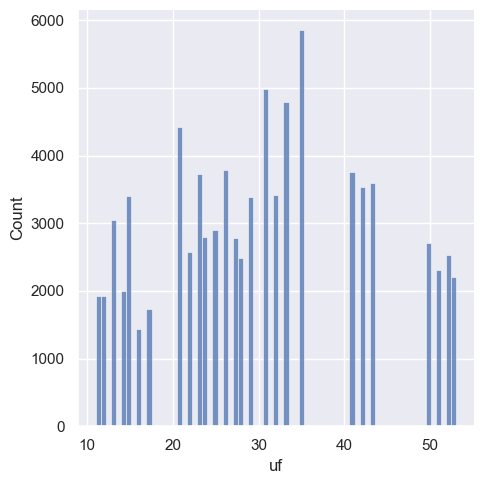

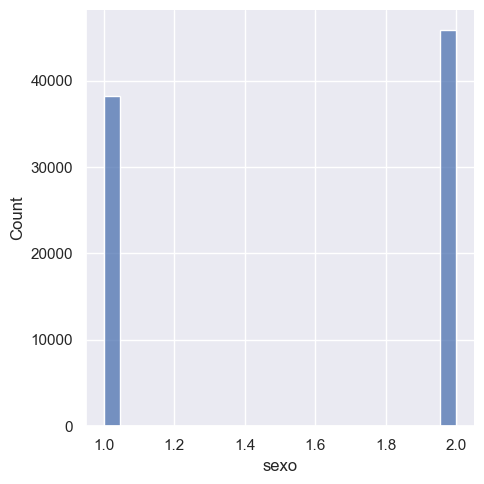

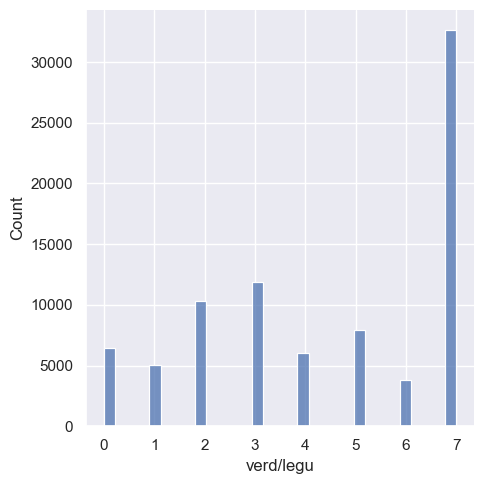

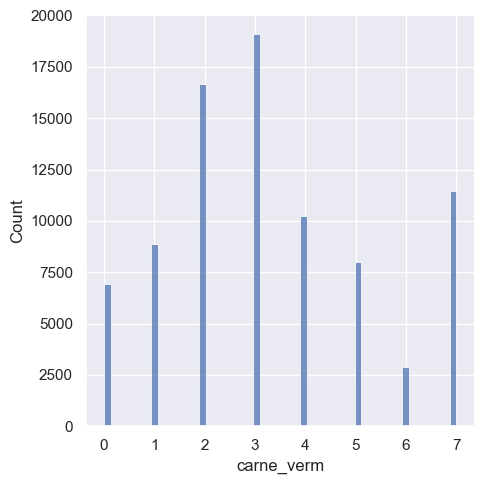

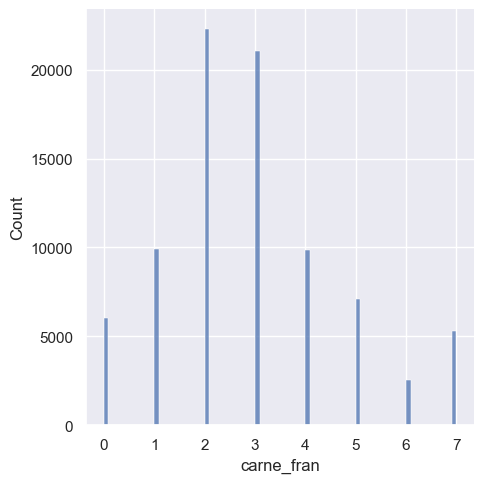

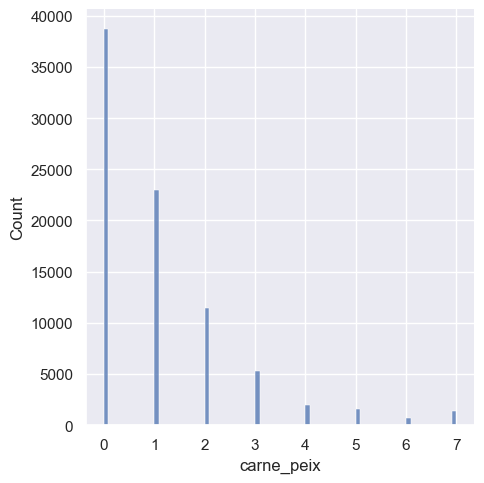

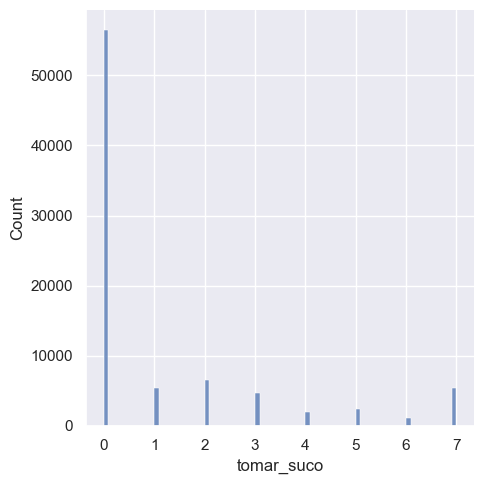

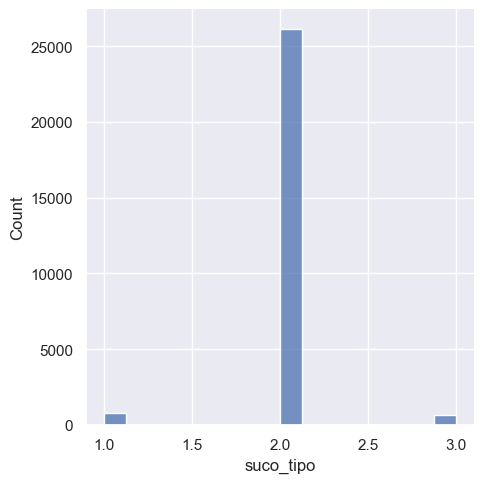

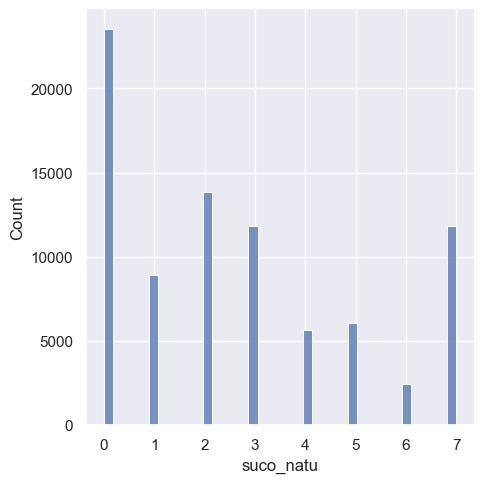

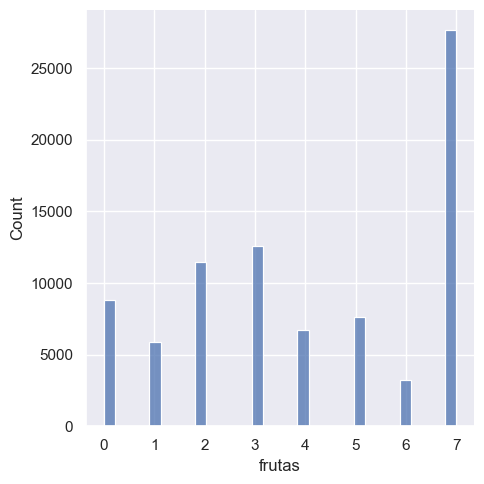

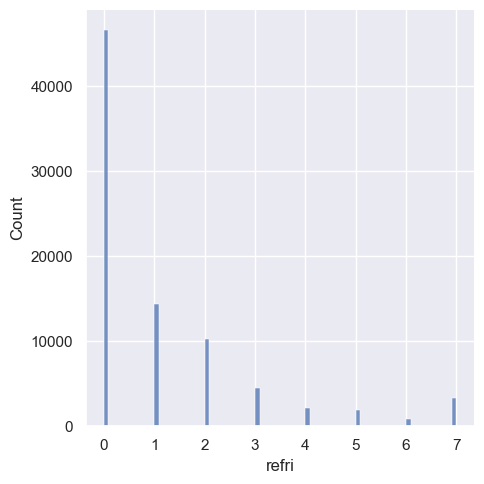

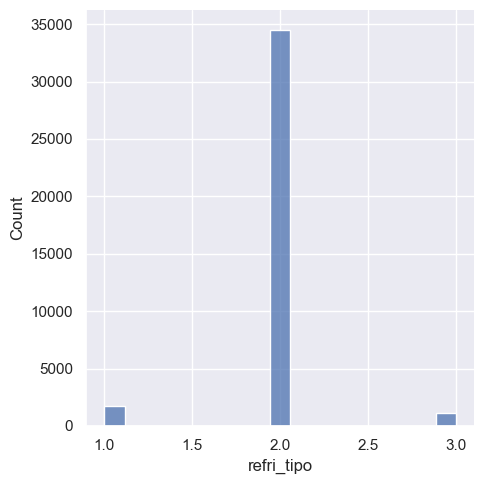

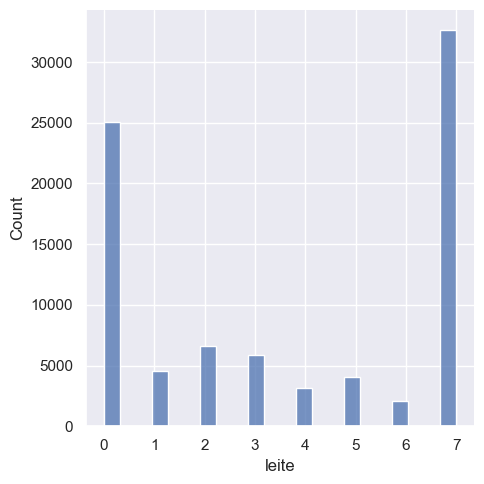

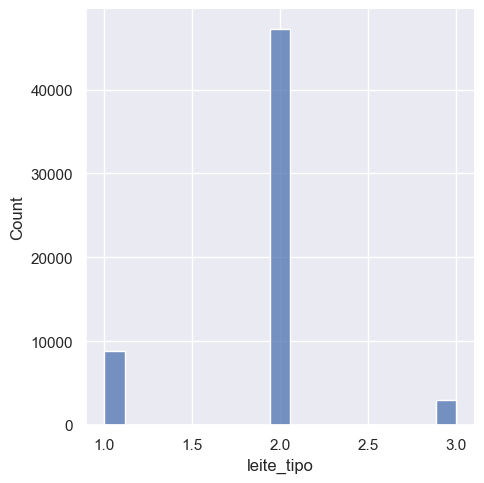

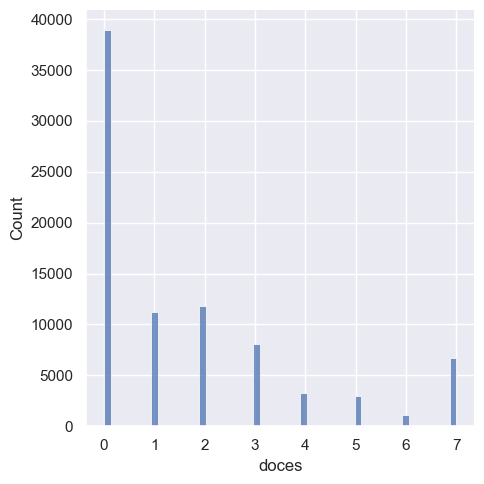

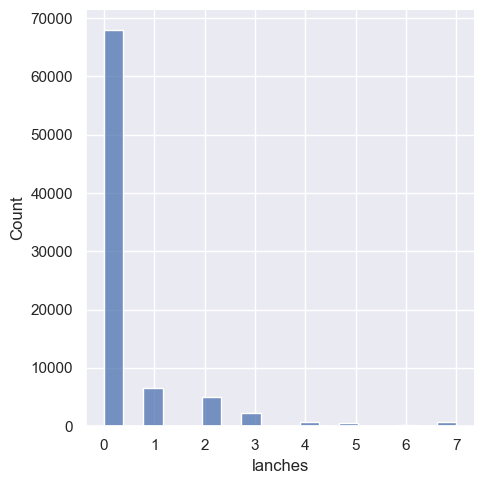

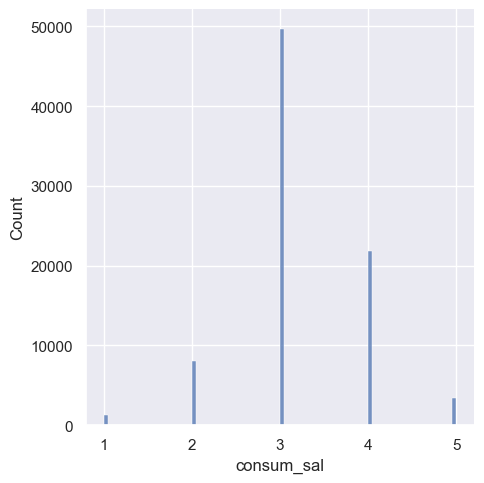

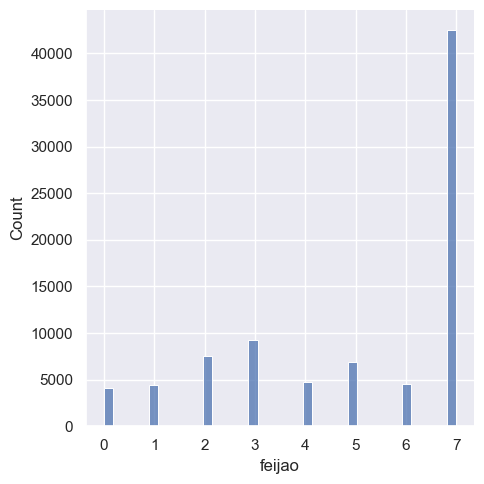

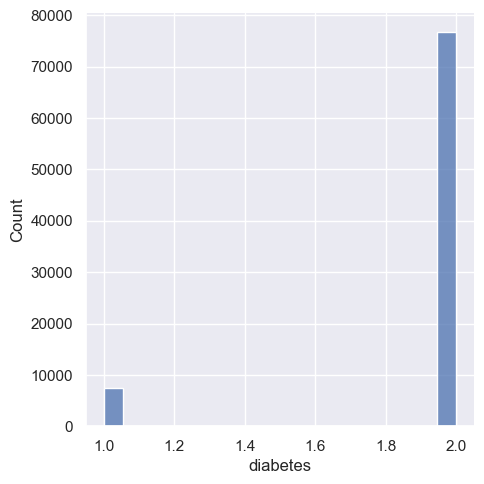

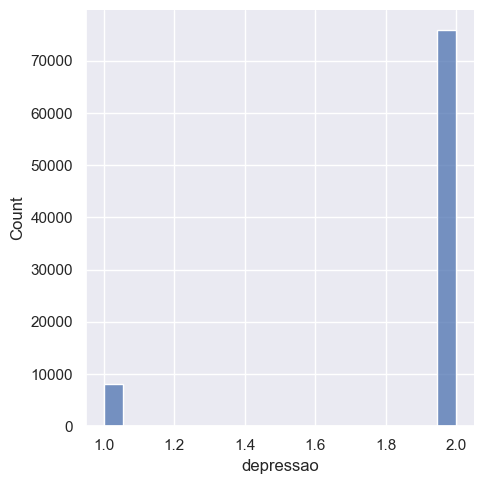

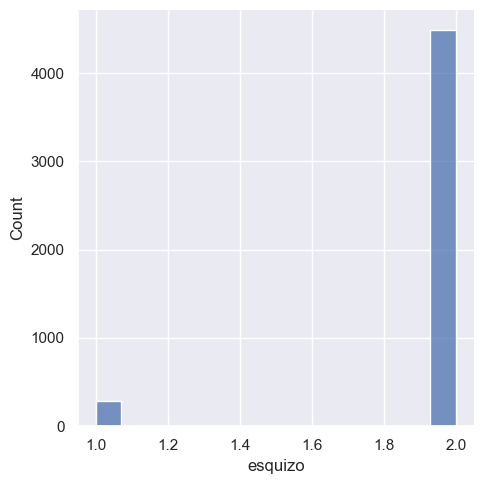

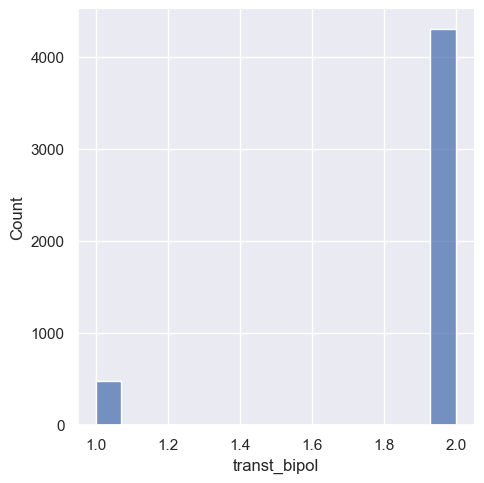

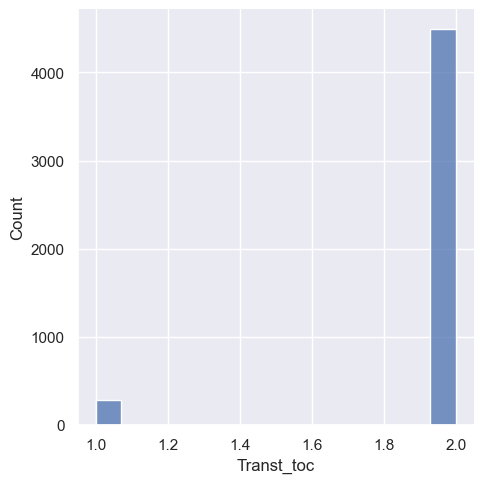

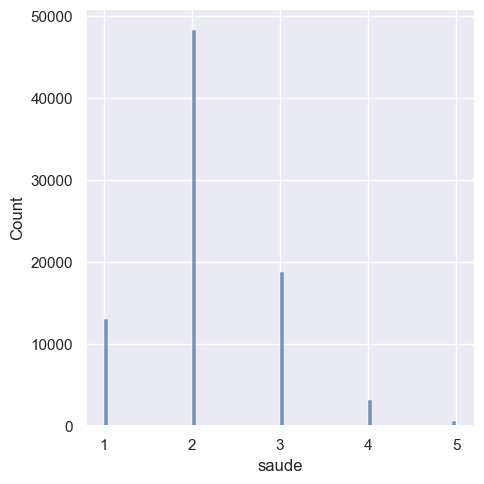

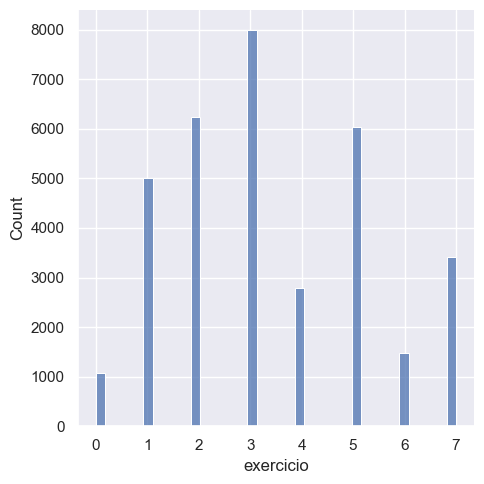

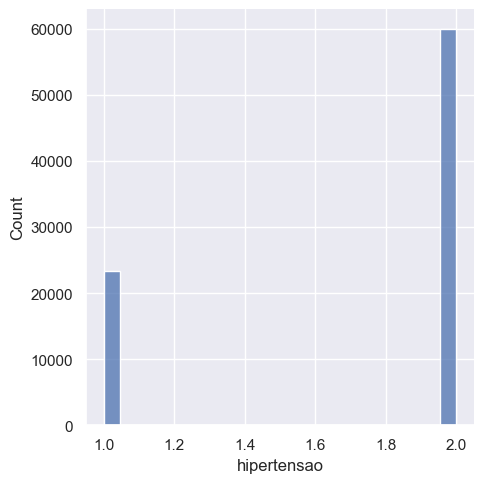

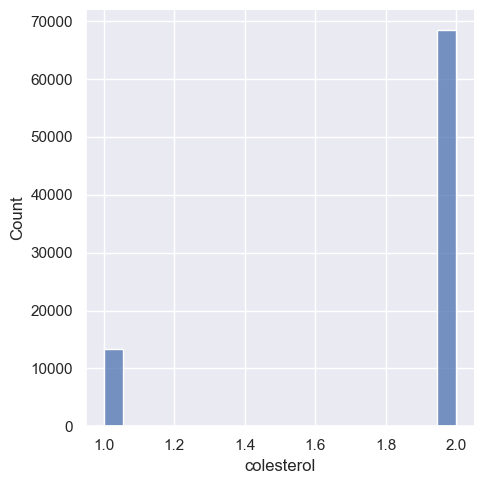

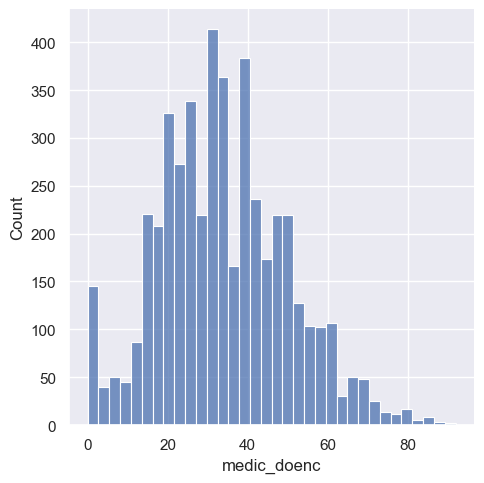

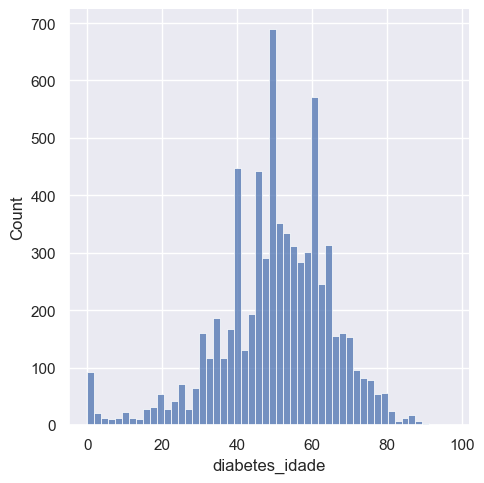

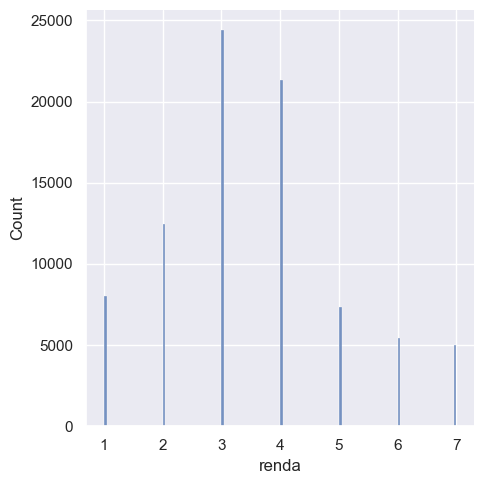

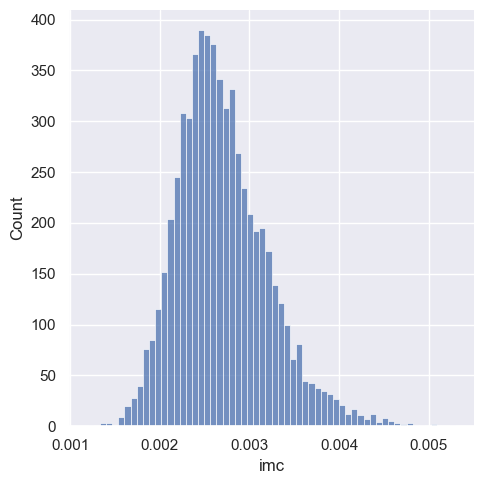

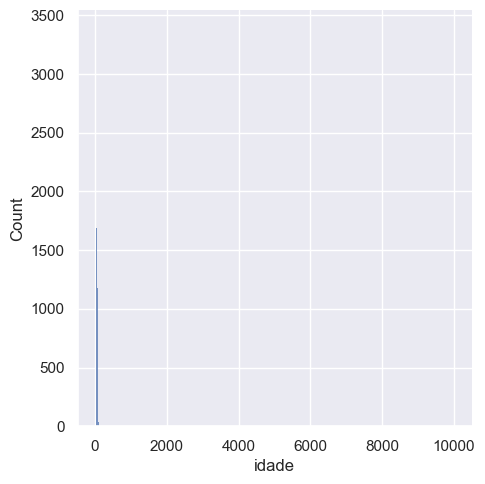

In [40]:
# Verificar as distribuições normais entre as variáveis contínuas

plt.figure(figsize=(20,15))
j=1
for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        sns.displot(df[i])
        #plt.subplot(2,3,j)
        j+=1
        print(df[i].name, ':', df[i].skew())
#plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Density plot')

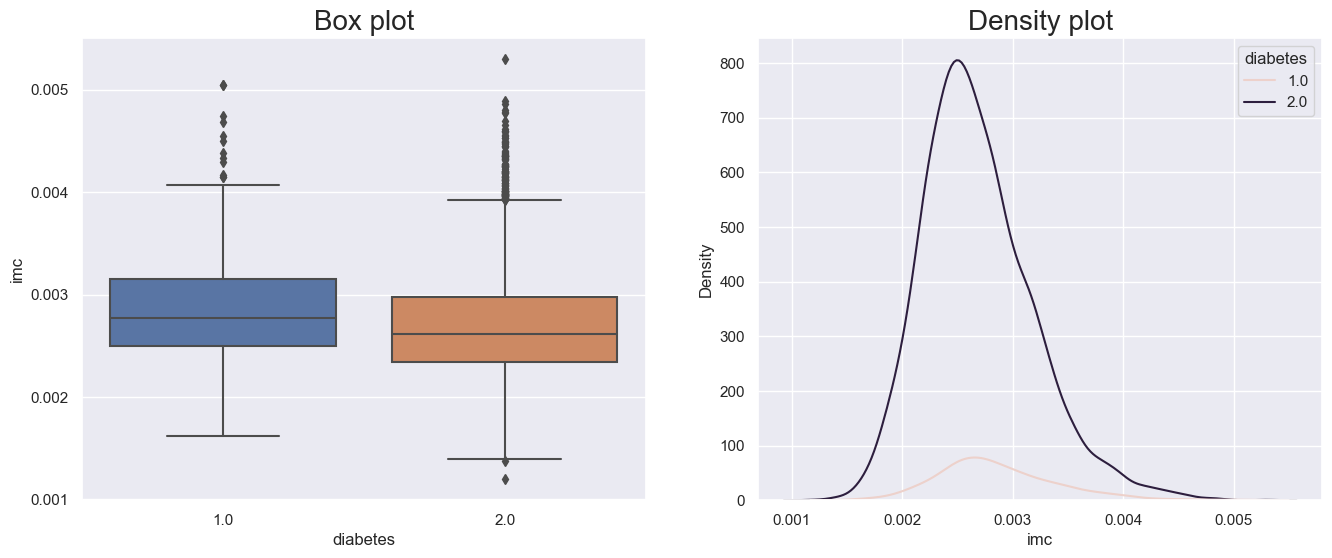

In [41]:
sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

# Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x="diabetes", y="imc", data=df)
bp_ax.set_title('Box plot', fontsize = 20)

# Função Densidade de Probabilidade
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x='imc', hue='diabetes', data=df)
dp_ax.set_title('Density plot', fontsize = 20)

# Boxplots: Distribuição do atributo (age) para cada classe de saída (survived), além de fornecer informações sobre os outliers
# Gráficos de densidade : Distribuição e a forma da distribuição (semelhante a normal ou qualquer outra distribuição) do atributo
# Gráficos de contagem empilhados: Informa sobre a contagem de cada categoria do atributo, e com informações sobre a porcentagem de cada categoria

In [42]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()), "->", df[col].max())

Valores ausentes (NaN) em:
uf : False -> 53
sexo : False -> 2.0
verd/legu : False -> 7.0
carne_verm : False -> 7.0
carne_fran : False -> 7.0
carne_peix : False -> 7.0
tomar_suco : False -> 7.0
suco_tipo : True -> 3.0
suco_natu : False -> 7.0
frutas : False -> 7.0
refri : False -> 7.0
refri_tipo : True -> 3.0
leite : False -> 7.0
leite_tipo : True -> 3.0
doces : False -> 7.0
lanches : False -> 7.0
consum_sal : False -> 5.0
feijao : False -> 7.0
diabetes : False -> 2.0
depressao : False -> 2.0
esquizo : True -> 2.0
transt_bipol : True -> 2.0
Transt_toc : True -> 2.0
saude : False -> 5.0
exercicio : True -> 7.0
hipertensao : True -> 2.0
colesterol : True -> 2.0
medic_doenc : True -> 92.0
diabetes_idade : True -> 97.0
renda : True -> 7.0
imc : True -> 0.0052979547687111
idade : False -> 9999.0


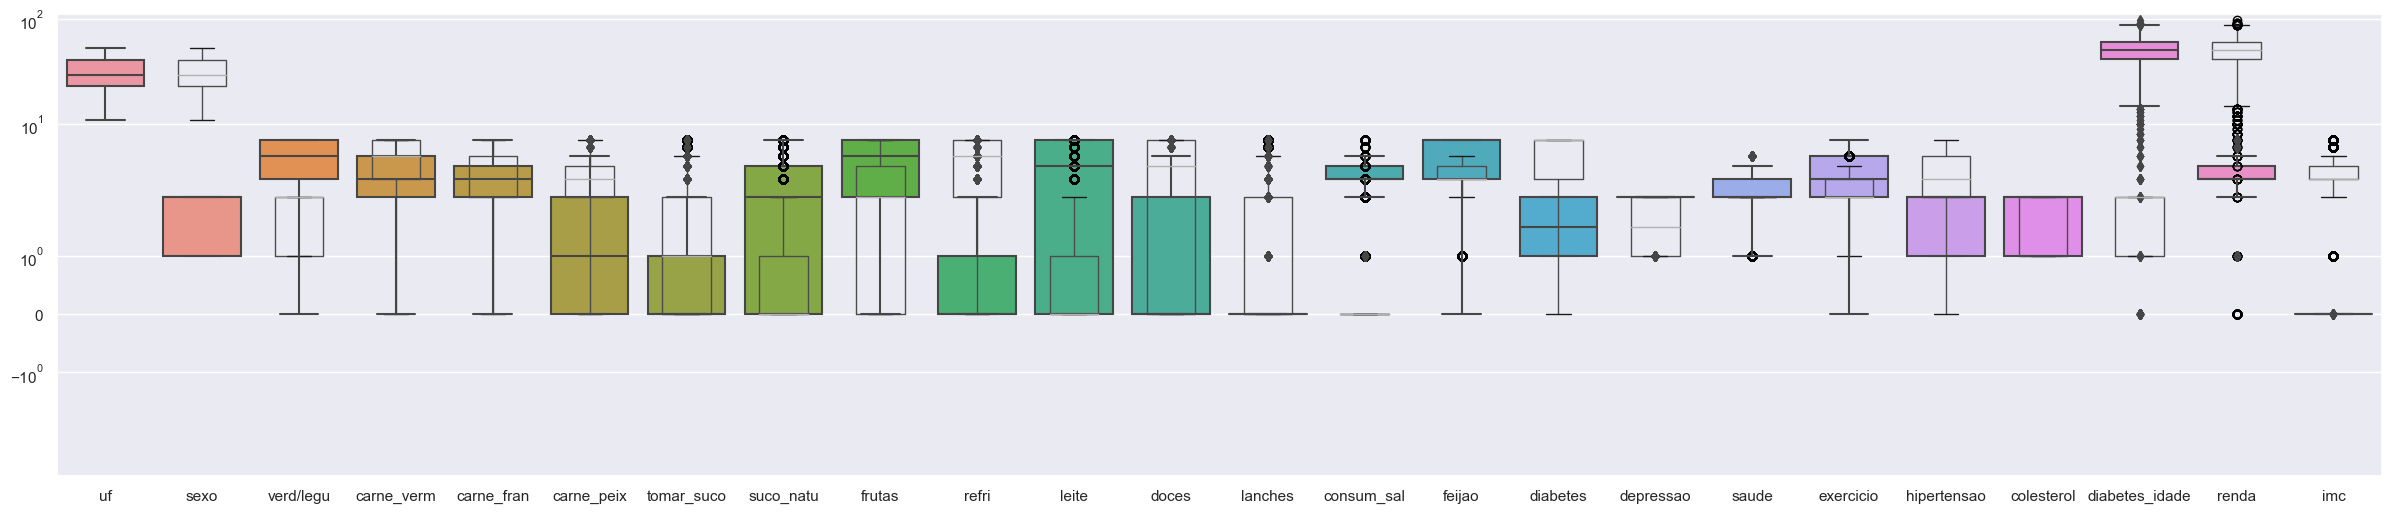

In [94]:
# Boxplot de todos os atributos contínuos antes da padronização
plt.figure(figsize=(30, 6))
df.boxplot()
cols = [col for col in df.columns if col != 'idade']
sns.boxplot(data=df[cols])
plt.yscale('symlog')